# Content and Objectives

+ Show how convergence in CLT depends on the observation length
+ Several distribution can be chosen which are then average to show the effect of the CLT

# Import

In [1]:
# importing
import numpy as np

from scipy import stats, special

import matplotlib.pyplot as plt
import matplotlib

# showing figures inline
%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# vector of realizations for CLT
# NOTE: you may adapt this to play with the parameters
# NOTE: Would increase length of N_trials to much since this will be plots in a row
N_realizations = int( 1e5 )
N_trials = np.array( [ 5, 10, 50, 200 ] )
len_N_trials = len( N_trials )

rng = np.random.default_rng()


In [4]:
distributions = [
    stats.norm(loc=0, scale=1),
    stats.uniform(loc=-1, scale=2),
    stats.expon(scale=1),
    stats.binom( 20, .3),
    stats.gamma( a=3, loc=0, scale=1),
    stats.beta( a=1, b=.5, loc=0, scale=1),
]

# select one distribution or sample it randomly
dist = np.random.choice(distributions)
dist = distributions[ 2 ]

# Simulation

+ first samples are generated and stored in a dict
+ then, min/max values for x and y are determined to have unique axes in later plot

In [5]:
# sample population for CLT
# using dictionaries here; you may check this out in "basic_concepts" simulation
X = {}
S = {} 
histo_X = {}
histo_S = {}

# loop for different N
for N in N_trials:

    # SELECT YOU DISTRIBUTION HERE
    samples = dist.rvs( size = ( N, N_realizations ) )
    X[ N ] = np.average( samples, axis=0 ) 
    histo_X[ N ] = np.histogram( X[ N ], bins=50, density=True )

    S[ N ] = np.sum( samples, axis=0 ) 
    histo_S[ N ] = np.histogram( S[ N ], bins=50, density=True )

x_min_X = np.min( np.concatenate( [histo_X[N][1] for N in N_trials ]) ) 
x_max_X = np.max( np.concatenate( [histo_X[N][1] for N in N_trials ]) ) 
y_min_X = np.min( np.concatenate( [histo_X[N][0] for N in N_trials ]) ) 
y_max_X = np.max( np.concatenate( [histo_X[N][0] for N in N_trials ]) ) 

x_min_S = np.min( np.concatenate( [histo_S[N][1] for N in N_trials ]) ) 
x_max_S = np.max( np.concatenate( [histo_S[N][1] for N in N_trials ]) ) 
y_min_S = np.min( np.concatenate( [histo_S[N][0] for N in N_trials ]) ) 
y_max_S = np.max( np.concatenate( [histo_S[N][0] for N in N_trials ]) ) 

### plotting

-----
Distribution:  expon
-----

Please note that the variance of averaging is reducing, whereas the variance of summation is increasing!



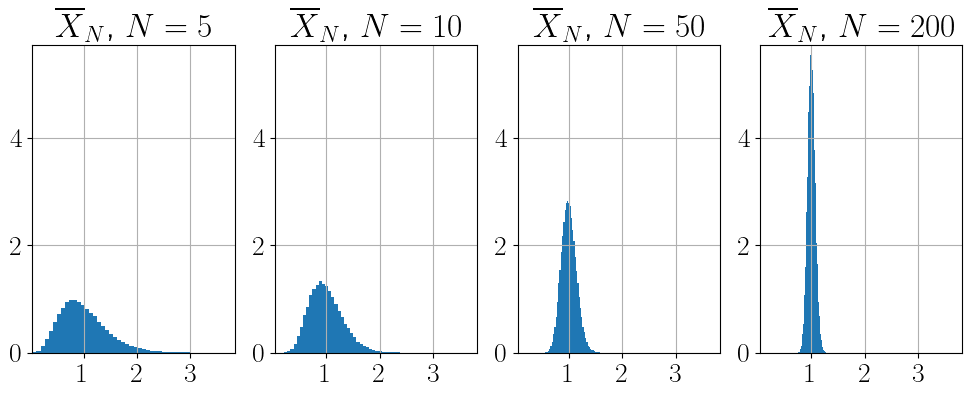

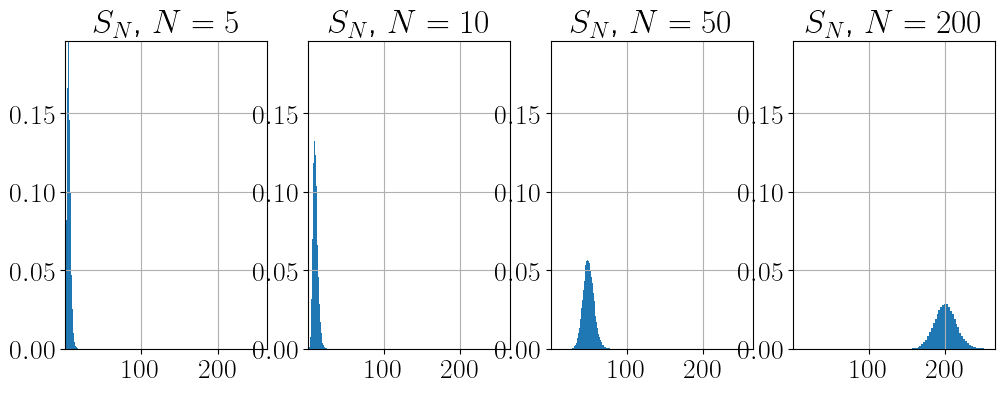

In [6]:
print('-----')
print('Distribution: ', dist.dist.name )
print('-----\n')

print(r'Please note that the variance of averaging is reducing, whereas the variance of summation is increasing!')
print()

fig, axes = plt.subplots(1, len_N_trials, figsize=(12, 4))
axes = axes.flatten()

for ind_N, val_N in enumerate( N_trials ):
    axes[ ind_N ].hist( X[ val_N ], bins=50, density=True )
    axes[ ind_N ].grid(1)
    axes[ ind_N ].set_title( r"$\overline{X}_N$, " + str( "$N={}$".format( val_N ) ) )
for ax in axes:
    ax.set_xlim( (x_min_X, x_max_X) )
    ax.set_ylim( (y_min_X, y_max_X) )

fig, axes = plt.subplots(1, len_N_trials, figsize=(12, 4))
axes = axes.flatten()

for ind_N, val_N in enumerate( N_trials ):
    axes[ ind_N ].hist( S[ val_N ], bins=50, density=True )
    axes[ ind_N ].grid(1)
    axes[ ind_N ].set_title( r"$S_N$, " + str( "$N={}$".format( val_N ) ) )

for ax in axes:
    ax.set_xlim( (x_min_S, x_max_S) )
    ax.set_ylim( (y_min_S, y_max_S) )
    